# 1. Downloading, Installing

In [98]:
import numpy as np
import matplotlib
import pandas
import sklearn
import random

# 2. Load The Data

### 2.1 Import libraries

In [99]:
# Load libraries
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing


### 2.2 Load Dataset

In [100]:
# Load dataset
dataset = pandas.read_csv("iris.csv")
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.2 Processig_Encoding

In [121]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [102]:
dataset['species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [103]:
#categorical feature
le = preprocessing.LabelEncoder()
dataset['species'] = le.fit_transform(dataset['species'])
#data.replace()

In [104]:
with open('unshuffled.csv', 'r') as r, open('shuffled.csv', 'w') as w:
    un_data = r.readlines()
    header, rows = un_data[0], un_data[1:]
    random.shuffle(rows)
    rows = '\n'.join([row.strip() for row in rows])
    w.write(header + rows)

In [105]:
dataset = pandas.read_csv("shuffled.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.5,3.0,5.5,1.8,virginica
1,6.7,3.0,5.2,2.3,virginica
2,4.4,3.2,1.3,0.2,setosa
3,5.7,2.5,5.0,2.0,virginica
4,5.8,2.7,5.1,1.9,virginica


# 3. Summarize the Dataset

### 3.1 Dimensions of Dataset

In [106]:
#Dimensions of Dataset (rows,columns)
print(dataset.shape)

(150, 5)


### 3.2 Peek at the Data

In [107]:
#Peek at the Data
print(dataset.head(10))

   sepal_length  sepal_width  petal_length  petal_width     species
0           6.5          3.0           5.5          1.8   virginica
1           6.7          3.0           5.2          2.3   virginica
2           4.4          3.2           1.3          0.2      setosa
3           5.7          2.5           5.0          2.0   virginica
4           5.8          2.7           5.1          1.9   virginica
5           6.1          2.8           4.7          1.2  versicolor
6           5.6          2.8           4.9          2.0   virginica
7           5.1          3.4           1.5          0.2      setosa
8           6.4          3.2           5.3          2.3   virginica
9           4.5          2.3           1.3          0.3      setosa


### 3.3 Statistical Summary

In [108]:
#Statistical Summary
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 3.4 Class Distribution

In [109]:
print(dataset.groupby('species').size())


species
setosa        50
versicolor    50
virginica     50
dtype: int64


# 4. Data Visualization

### 4.1 histograms Plots

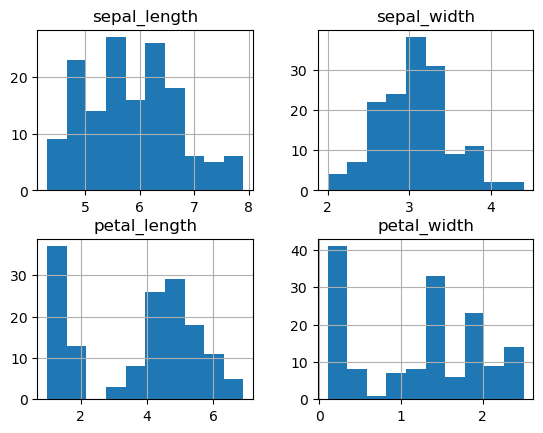

In [110]:
# histograms
dataset.hist()
pyplot.show()

# 5. Evaluate Some Algorithms

### 5.1 Split Data


In [111]:
# Splitting data to input and output
data_input = dataset.drop('species', axis=1)
data_output = dataset['species']
X,X_test,Y,Y_test = train_test_split(data_input,data_output, test_size=0.3, random_state=1)




In [112]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.3, random_state=1)


<Axes: xlabel='species', ylabel='count'>

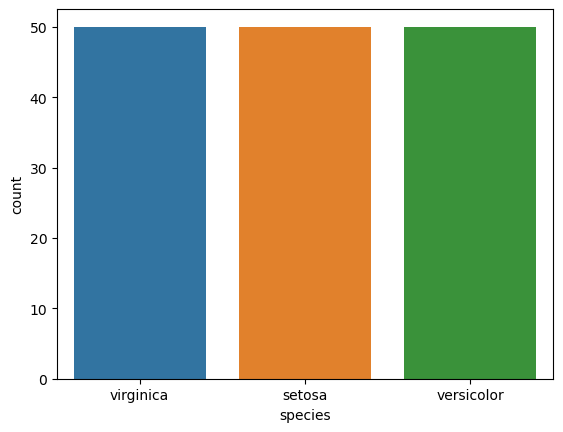

In [113]:
import seaborn as sns
sns.countplot(x = "species",data = dataset)

In [114]:
print(X_train.shape)



(73, 4)


In [115]:
def model_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

### 5.2 Build Models

In [116]:
models_list = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(max_depth=4,min_samples_split=25,random_state=0),
    SVC(C=5,gamma='scale',random_state=44),
]

In [117]:
results_dict = {
    'model_name': [],
    'acc_train': [],
    'acc_val': [],
}

# for each model
for model in models_list:
    # evaluate the model and calculate acc_train and acc_val
    acc_train, acc_val = model_evaluate(
        model,
        X_train,
        Y_train,
        X_val,
        Y_val
    )
    
    # storing results in results_dict
    results_dict['model_name'].append(model.__class__.__name__)
    results_dict['acc_train'].append(acc_train)
    results_dict['acc_val'].append(acc_val)
    
# converting results_dict to a DataFrame
results_df = pandas.DataFrame(results_dict)
results_df

,model_name,acc_train,acc_val
0,GaussianNB,0.986301,0.9375
1,KNeighborsClassifier,1.000000,0.9375
2,DecisionTreeClassifier,1.000000,0.9375
3,SVC,0.986301,1.0000


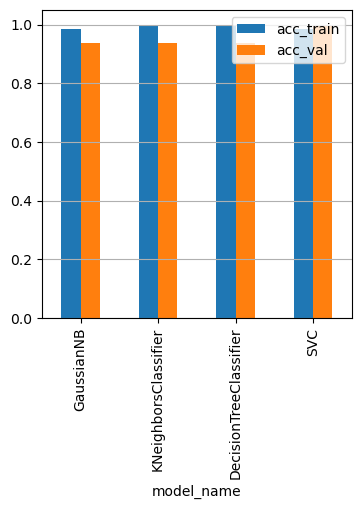

In [118]:
import numpy as np
import matplotlib.pyplot as plt


results_df.plot.bar(x='model_name', y=['acc_train', 'acc_val'], figsize=(4,4))
plt.grid(axis='y')
plt.show()

# 6. Make Predictions

### 6.1 Make Predictions

In [119]:
best_model =DecisionTreeClassifier(max_depth=3,min_samples_split=15)
best_model.fit(X_train, Y_train)
y_pred_test = best_model.predict(X_test)
accuracy_score(Y_test, y_pred_test)

0.9111111111111111

### Confusion_Matrix  

In [120]:
import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(Y_test, y_pred_test, labels=['setosa', 'versicolor','virginica']), 
    index=['true:setosa', 'true:versicolor','true:virginica'], 
    columns=['pred:setosa', 'pred:versicolor','pred:virginica']
)
print(cmtx)

                 pred:setosa  pred:versicolor  pred:virginica
true:setosa               15                0               0
true:versicolor            0               19               1
true:virginica             0                3               7
